# Introduction

Here I'm looking at the cover times of the random walker versus the urban explorer on the ring graph

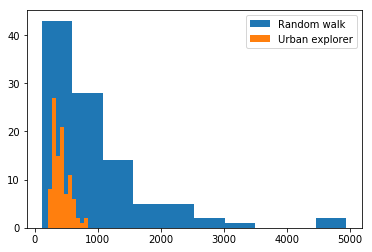

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.barbell_graph(num_nodes,1)

num_trials, m = 100, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_ring_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_ring_random_walker.txt',Ts_rw)

Good. Makes sense; the advective part of the urban explorer is useful on the ring. I wonder could I find
that curve analytically. Is it an exponential?

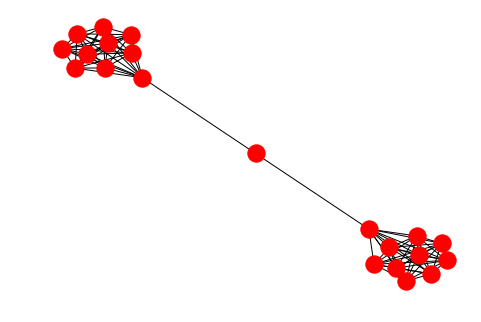

In [6]:
G = nx.barbell_graph(10,1)
nx.draw(G)

## Be systematic

finished N = 5
finished N = 10
finished N = 15
finished N = 20
finished N = 25
finished N = 30
finished N = 35
finished N = 40
finished N = 45
finished N = 50
finished N = 55
finished N = 60
finished N = 65
finished N = 70
finished N = 75
finished N = 80
finished N = 85
finished N = 90
finished N = 95
finished N = 100


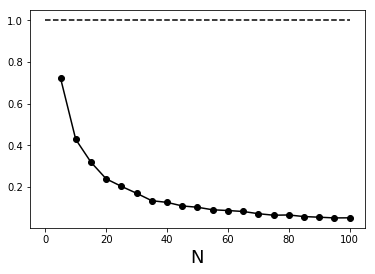

In [26]:
meanTratios = []
ue, rw = [], []
Ns = range(5,101,5)
m = 1
for N in Ns:
    num_trials = 1000
    G = nx.cycle_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    ue.append(np.mean(Ts_ue))
    rw.append(np.mean(Ts_rw))
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

np.savetxt('data/mean_covertime_ratio_barbell.txt',meanTratios)
np.savetxt('data/mean_covertime_ratio_barbell_Ns.txt',Ns)

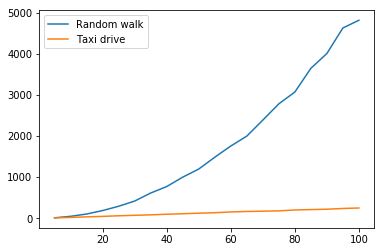

In [27]:
plt.plot(Ns,rw)
plt.plot(Ns,ue)
plt.legend(['Random walk', 'Taxi drive'])

array([0.4238795 , 2.03390259])

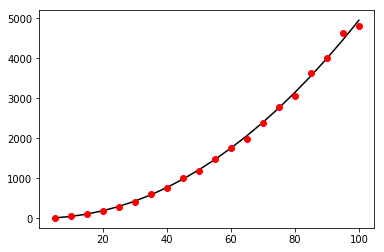

In [28]:
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,rw)
plt.plot(Ns, func(Ns, *popt), 'k')
plt.plot(Ns,rw, 'ro')
popt

array([2.04328303, 1.04297764])

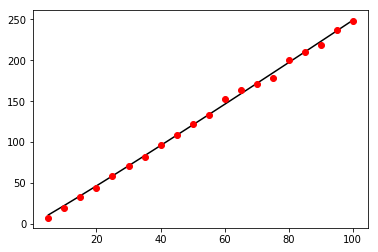

In [29]:
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,ue)
plt.plot(Ns, func(Ns, *popt), 'k')
plt.plot(Ns,ue, 'ro')
popt

In [75]:
np.savetxt('data/mean_cover_td_ring.txt',T_mean)
np.savetxt('data/mean_cover_td_ring_Ns.txt',Ns)
np.savetxt('data/mean_cover_td_ring_std.txt',T_std)

In [16]:
T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_ring_std.txt')

from scipy.optimize import curve_fit
def func(N,a,b):
    return a*N**2 + N*b
popt, pcov = curve_fit(func,Ns,T_mean)
popt, pcov
#plt.plot(Ns, [func(N,popt[0]) for N in Ns], 'b--')
#plt.plot(Ns,T_mean,'bo')

(array([-2.90009521e-06,  2.52212940e+00]),
 array([[ 4.01358725e-10, -3.08357351e-07],
        [-3.08357351e-07,  2.52652700e-04]]))

### Increase num samples at fixed $N$